# Analysis for Bitcoin and ETH
* Web Scrapping for the closing values of Bitcoin and ETH 
* DataFrame for data from 01.01.2016 to 31.10.2019
* Analysis of the data using Pandas, Matplotlib
* Get correlation coefficients for Bitcoin and ETH

### Use libraries like requests and BeautifulSoup for web scrapping

In [2]:
import requests
r_bit = requests.get('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160101&end=20191031')
print(r_bit)
r_eth = requests.get('https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20160101&end=20191031')
print(r_eth)

<Response [200]>
<Response [200]>


In [66]:
# Lets print the first 500 characters of the each HTML
print(r_bit.text[0:500])
print(r_eth.text[0:500])

<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8" class="next-head" /><meta http-equiv="x-ua-compatible" content="ie=edge" class="next-head" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" class="next-head" /><link rel="preconnect" href="https://s2.coinmarketcap.com" crossorigin="anonymous" class="next-head" /><link rel="preconnect" href="https://files.coinmarketcap.com" class="next-head" /><link rel="preconnect" href="//www.googletagmanager.com" 
<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8" class="next-head" /><meta http-equiv="x-ua-compatible" content="ie=edge" class="next-head" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" class="next-head" /><link rel="preconnect" href="https://s2.coinmarketcap.com" crossorigin="anonymous" class="next-head" /><link rel="preconnect" href="https://files.coinmarketcap.com" class="next-head" /><link rel="preconnect" href="//www.googletagmanager.com"

### We need to process this using BeautifulSoup
* This is a dynamic process 
* It needs to be monitored in each step so we get what we require

In [1]:
from bs4 import BeautifulSoup

In [4]:
soup_bit = BeautifulSoup(r_bit.text, 'lxml')
soup_eth = BeautifulSoup(r_eth.text, 'lxml')

### This is the time that we need to visit website and check what we need so we can find that in the SOUP
* Ctl F and find Nov 01, 2019
* Remeber that we are interested in the values
* try to look for headings 'Date','open*','High','Low','Close**','Volume'and 'Market Cap'
* we do not need to scrape this but stuff after this
* Check for the angle brackets after that

In [67]:
# We hashtag this cell as the output is making the file way too big
# print(soup_bit)
# print(soup_eth)
# If you clt F Nov 01, 2019 you will find that there three tags
# tag 1 (closest to Nov 01) is <td>
# tag 2 is <tr>
# tag 3 is <tbody>
# lets close-in

In [6]:
soup_bit.find('tbody') #next is we need <tr>

<tbody><tr class="cmc-table-row sc-1ebpa92-0 kQmhAn"><td class="cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left"><div class="ec35kh-0 dWPDaQ">Nov 01, 2019</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,193.99</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,275.66</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,132.05</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,261.10</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">24,324,691,031</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">166,928,044,164</div></td></tr><tr class="cmc-table-row sc-1ebpa92-0 kQmhAn"><td class="cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left"><div class="ec35kh-0 dWPDaQ">Oct 31, 2019</div></td><td class="cmc-tabl

In [13]:
soup_bit.find('tbody').find('tr')
# THis gives first tr tag in <tbody> tag
# Similarly if we add .find('td') on top of this
# then it will return the first value of <tr>

<tr class="cmc-table-row sc-1ebpa92-0 kQmhAn"><td class="cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left"><div class="ec35kh-0 dWPDaQ">Nov 01, 2019</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,193.99</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,275.66</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,132.05</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,261.10</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">24,324,691,031</div></td><td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">166,928,044,164</div></td></tr>

In [14]:
# But we need more than one value from the first record
# We create a list like object of <tr> which contain all <td> type elements
soup_bit.find('tbody').find('tr').find_all('td')

[<td class="cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left"><div class="ec35kh-0 dWPDaQ">Nov 01, 2019</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,193.99</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,275.66</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,132.05</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,261.10</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">24,324,691,031</div></td>,
 <td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">166,928,044,164</div></td>]

In [15]:
# We need Date which is 0th element
print(soup_bit.find('tbody').find('tr').find_all('td')[0])
# And we need close value which is 4th element (cross verfy this on web-site)
print(soup_bit.find('tbody').find('tr').find_all('td')[4])

<td class="cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left"><div class="ec35kh-0 dWPDaQ">Nov 01, 2019</div></td>
<td class="cmc-table__cell cmc-table__cell--right"><div class="sc-47a23l-0 jzTYkA">9,261.10</div></td>


In [20]:
# More precisely we need the text
print(soup_bit.find('tbody').find('tr').find_all('td')[0].text)
print(soup_bit.find('tbody').find('tr').find_all('td')[4].text)

Nov 01, 2019
9,261.10


In [21]:
import pandas as pd

In [24]:
# Imported pandas so we can convert the 'date' string to datetime object
print(pd.to_datetime(soup_bit.find('tbody').find('tr').find_all('td')[0].text))
# Also we need to convert 'close value' from string to float
# but remember you need to remove the ',' from the string
print(float(soup_bit.find('tbody').find('tr').find_all('td')[4].text.replace(',','')))

2019-11-01 00:00:00
9261.1


In [25]:
# Check the data type of both
print(type(pd.to_datetime(soup_bit.find('tbody').find('tr').find_all('td')[0].text)))

print(type(float(soup_bit.find('tbody').find('tr').find_all('td')[4].text.replace(',',''))))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'float'>


In [27]:
# Let's apply same logic to soup_eth
print((pd.to_datetime(soup_eth.find('tbody').find('tr').find_all('td')[0].text)))
print(type(pd.to_datetime(soup_eth.find('tbody').find('tr').find_all('td')[0].text)))
print((float(soup_eth.find('tbody').find('tr').find_all('td')[4].text.replace(',',''))))
print(type(float(soup_eth.find('tbody').find('tr').find_all('td')[4].text.replace(',',''))))

2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
183.97
<class 'float'>


In [30]:
# This is one record
# Let's write a code to get all the records with similar logic
# Bitcoin
# first we need to make list type object out of all the recods of BIT
# That list type object would be soup_bit.find('tbody').find_all('tr')
# Take a moment and find out what it means
all_records_bit = []
for result in soup_bit.find('tbody').find_all('tr'):
    date = pd.to_datetime(result.find_all('td')[0].text)
    close_value = result.find_all('td')[4].text.replace(',','')
    all_records_bit.append((date,close_value))
    
all_records_eth = []
for result in soup_eth.find('tbody').find_all('tr'):
    date = pd.to_datetime(result.find_all('td')[0].text)
    close_value = result.find_all('td')[4].text.replace(',','')
    all_records_eth.append((date,close_value))

In [34]:
# Check out first five and last five recods of each
all_records_bit[:5]

[(Timestamp('2019-11-01 00:00:00'), '9261.10'),
 (Timestamp('2019-10-31 00:00:00'), '9199.58'),
 (Timestamp('2019-10-30 00:00:00'), '9205.73'),
 (Timestamp('2019-10-29 00:00:00'), '9427.69'),
 (Timestamp('2019-10-28 00:00:00'), '9256.15')]

In [35]:
all_records_bit[-5:]

[(Timestamp('2016-01-05 00:00:00'), '431.96'),
 (Timestamp('2016-01-04 00:00:00'), '433.09'),
 (Timestamp('2016-01-03 00:00:00'), '430.01'),
 (Timestamp('2016-01-02 00:00:00'), '433.44'),
 (Timestamp('2016-01-01 00:00:00'), '434.33')]

In [36]:
all_records_eth[:5]

[(Timestamp('2019-11-01 00:00:00'), '183.97'),
 (Timestamp('2019-10-31 00:00:00'), '183.97'),
 (Timestamp('2019-10-30 00:00:00'), '184.69'),
 (Timestamp('2019-10-29 00:00:00'), '190.34'),
 (Timestamp('2019-10-28 00:00:00'), '182.66')]

In [37]:
all_records_eth[-5:]

[(Timestamp('2016-01-05 00:00:00'), '0.950176'),
 (Timestamp('2016-01-04 00:00:00'), '0.954480'),
 (Timestamp('2016-01-03 00:00:00'), '0.971905'),
 (Timestamp('2016-01-02 00:00:00'), '0.937124'),
 (Timestamp('2016-01-01 00:00:00'), '0.948024')]

In [40]:
# Let's build a DataFrame out of this
df_bit = pd.DataFrame(all_records_bit,columns=['Date','Close_value_bit'])
df_eth = pd.DataFrame(all_records_eth,columns=['Date','Close_value_eth'])
print(df_bit.head())
print(df_eth.head())

        Date Close_value_bit
0 2019-11-01         9261.10
1 2019-10-31         9199.58
2 2019-10-30         9205.73
3 2019-10-29         9427.69
4 2019-10-28         9256.15
        Date Close_value_eth
0 2019-11-01          183.97
1 2019-10-31          183.97
2 2019-10-30          184.69
3 2019-10-29          190.34
4 2019-10-28          182.66


In [42]:
# Let's merge both these DataFrames in one DF
df_bit_eth = pd.merge(df_bit,df_eth) # how='inner' is default
df_bit_eth 

,Date,Close_value_bit,Close_value_eth
0,2019-11-01,9261.10,183.97
1,2019-10-31,9199.58,183.97
2,2019-10-30,9205.73,184.69
3,2019-10-29,9427.69,190.34
4,2019-10-28,9256.15,182.66
5,2019-10-27,9551.71,184.24
6,2019-10-26,9244.97,179.84
7,2019-10-25,8660.70,181.52
8,2019-10-24,7493.49,162.17
9,2019-10-23,7514.67,162.40


In [46]:
# let's set date as index
df_bit_eth.set_index('Date').head()

,Close_value_bit,Close_value_eth
Date,,
2019-11-01,9261.10,183.97
2019-10-31,9199.58,183.97
2019-10-30,9205.73,184.69
2019-10-29,9427.69,190.34
2019-10-28,9256.15,182.66


In [45]:
df_bit_eth.head() # we didn't put inplace=True

,Date,Close_value_bit,Close_value_eth
0,2019-11-01,9261.10,183.97
1,2019-10-31,9199.58,183.97
2,2019-10-30,9205.73,184.69
3,2019-10-29,9427.69,190.34
4,2019-10-28,9256.15,182.66


In [49]:
#df_bit_eth.set_index('Date',inplace=True) # This was applied more than twice and thr an error
df_bit_eth.head()

,Close_value_bit,Close_value_eth
Date,,
2019-11-01,9261.10,183.97
2019-10-31,9199.58,183.97
2019-10-30,9205.73,184.69
2019-10-29,9427.69,190.34
2019-10-28,9256.15,182.66


In [50]:
df_bit_eth.to_csv('btc_eth.csv')

In [52]:
df = pd.read_csv('btc_eth.csv')
df.head() # index was not retained

,Date,Close_value_bit,Close_value_eth
0,2019-11-01,9261.10,183.97
1,2019-10-31,9199.58,183.97
2,2019-10-30,9205.73,184.69
3,2019-10-29,9427.69,190.34
4,2019-10-28,9256.15,182.66


In [54]:
df = pd.read_csv('btc_eth.csv',index_col='Date')
df.head() # index was retained

,Close_value_bit,Close_value_eth
Date,,
2019-11-01,9261.10,183.97
2019-10-31,9199.58,183.97
2019-10-30,9205.73,184.69
2019-10-29,9427.69,190.34
2019-10-28,9256.15,182.66


1. Getting the CLOSING price of BTC and ETH from CoinMarketCap from 01-01-2016 till today. 

Hints: the URLs can be found at 
https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160101&end=20190814
https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20160101&end=20190814

2. Plotting the price of these two coins

3. Compute and plot the daily return for the time period

4. Compute and plot the 7-day and 30-day moving average of the closing prices of these two coins

5. Compute and plot the correlation coefficients of the closing prices between these two coins for the last 12 months

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Plotting the price of these two coins

In [57]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

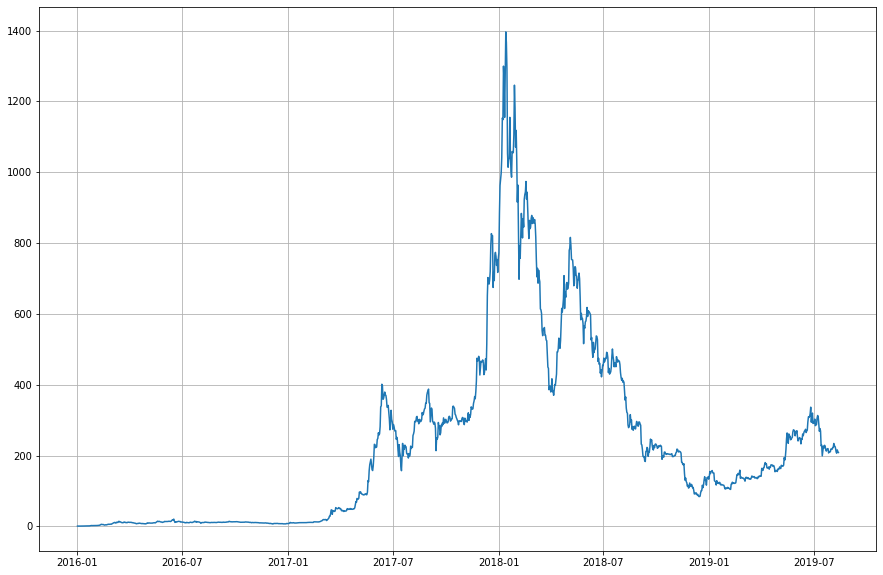

In [13]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close_value_eth'])

### Daily return Bitcoin

In [14]:
df_bit = pd.DataFrame(df['close_value_bit'])
df_bit.head()

,close_value_bit
Date,
2019-08-13,10895.83
2019-08-12,11382.62
2019-08-11,11523.58
2019-08-10,11354.02
2019-08-09,11862.94


In [15]:
df_bit.shift(-1).head()

,close_value_bit
Date,
2019-08-13,11382.62
2019-08-12,11523.58
2019-08-11,11354.02
2019-08-10,11862.94
2019-08-09,11966.41


In [16]:
daily_return_bit = pd.DataFrame((df_bit-df_bit.shift(-1))*100/df_bit.shift(-1))

In [17]:
daily_return_bit.head()

,close_value_bit
Date,
2019-08-13,-4.276608
2019-08-12,-1.223231
2019-08-11,1.493392
2019-08-10,-4.289999
2019-08-09,-0.864670


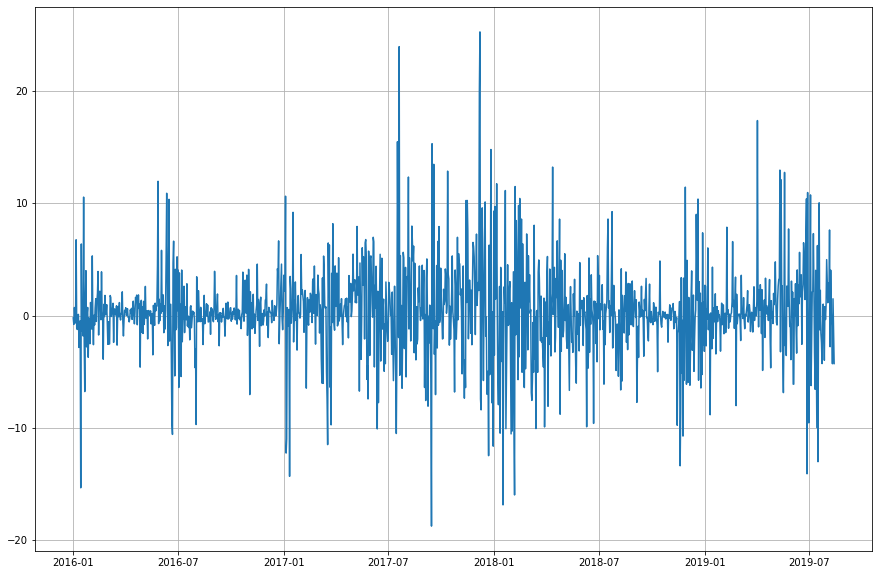

In [18]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(daily_return_bit)

### Daily return ETH

In [19]:
df_eth = pd.DataFrame(df['close_value_eth'])
df_eth.head()
                        

,close_value_eth
Date,
2019-08-13,208.71
2019-08-12,211.29
2019-08-11,216.09
2019-08-10,206.73
2019-08-09,210.49


In [20]:
daily_return_eth = (df_eth-df_eth.shift(-1))*100/df_eth.shift(-1)

In [21]:
daily_return_eth.head()

,close_value_eth
Date,
2019-08-13,-1.221071
2019-08-12,-2.221297
2019-08-11,4.527645
2019-08-10,-1.786308
2019-08-09,-4.729791


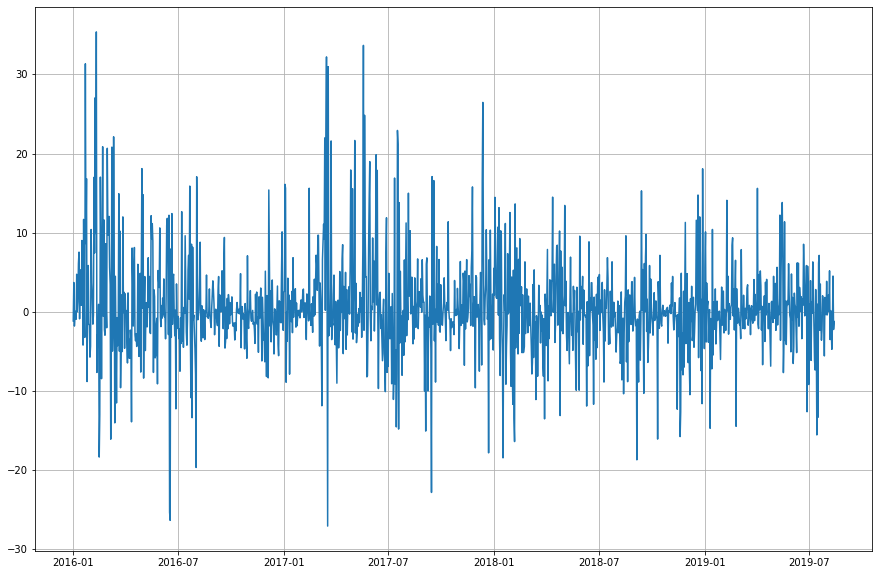

In [22]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(daily_return_eth)

### Compute and plot the 7-day and 30-day moving average of the closing prices of these two coins

## Bitcoin

In [23]:
df_bit.head()

,close_value_bit
Date,
2019-08-13,10895.83
2019-08-12,11382.62
2019-08-11,11523.58
2019-08-10,11354.02
2019-08-09,11862.94


In [24]:
df_bit['moving_avg_7'] = df_bit.close_value_bit.rolling(7,center=True).mean()
df_bit['moving_avg_30'] = df_bit.close_value_bit.rolling(30,center=True).mean()

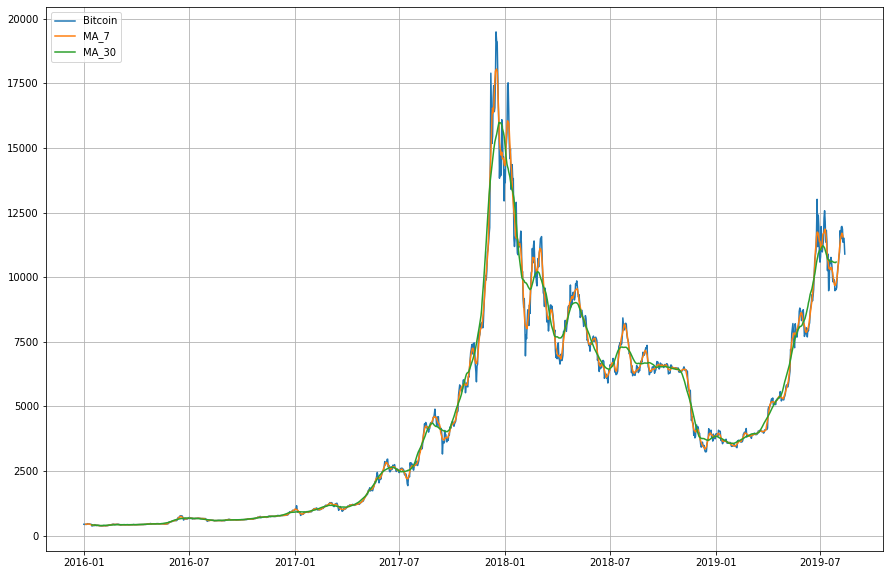

In [25]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_bit['close_value_bit'],label='Bitcoin')
plt.plot(df_bit['moving_avg_7'],label='MA_7')
plt.plot(df_bit['moving_avg_30'],label='MA_30')
plt.legend(loc=2)

## ETH

In [26]:
df_eth.tail(15)

,close_value_eth
Date,
2016-01-15,1.210000
2016-01-14,1.190000
2016-01-13,1.130000
2016-01-12,1.140000
2016-01-11,1.060000
2016-01-10,0.999231
2016-01-09,0.986833
2016-01-08,0.986789
2016-01-07,0.942005


In [27]:
df_eth['moving_avg_7'] = df_eth.close_value_eth.rolling(7,center=True).mean()
df_eth['moving_avg_30'] = df_eth.close_value_eth.rolling(30,center=True).mean()

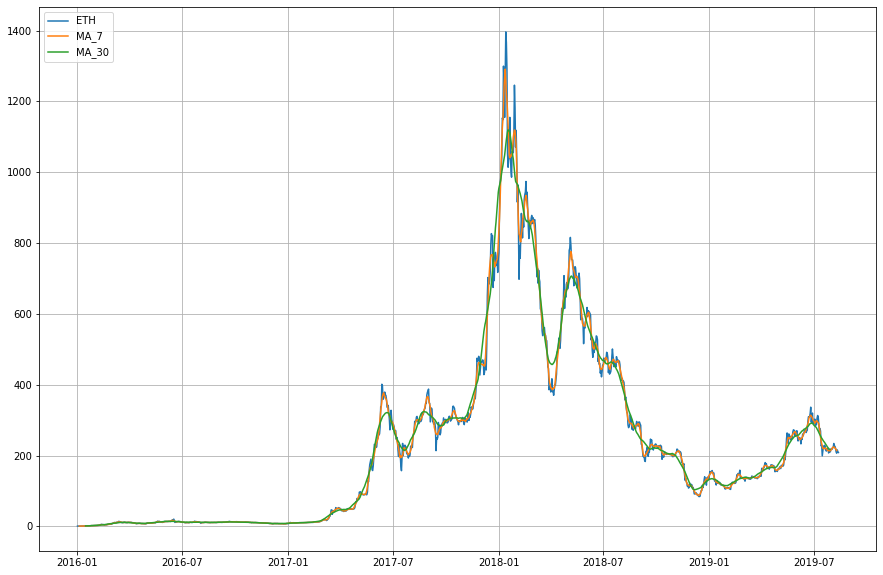

In [28]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_eth['close_value_eth'],label='ETH')
plt.plot(df_eth['moving_avg_7'],label='MA_7')
plt.plot(df_eth['moving_avg_30'],label='MA_30')
plt.legend(loc=2)

### Compute and plot the correlation coefficients of the closing prices between these two coins for the last 12 months



In [29]:
df.head()

,close_value_bit,close_value_eth
Date,,
2019-08-13,10895.83,208.71
2019-08-12,11382.62,211.29
2019-08-11,11523.58,216.09
2019-08-10,11354.02,206.73
2019-08-09,11862.94,210.49


In [33]:
df.corr()

,close_value_bit,close_value_eth
close_value_bit,1.000000,0.825902
close_value_eth,0.825902,1.000000


In [31]:
df[['close_value_bit','close_value_eth']].corr()

,close_value_bit,close_value_eth
close_value_bit,1.000000,0.825902
close_value_eth,0.825902,1.000000


In [64]:
df.iloc[:365].corr()

,Close_value_bit,Close_value_eth
Close_value_bit,1.000000,0.816045
Close_value_eth,0.816045,1.000000
